# Lane Finding and Vehicle Detection
### by Aaron Iglesias

## Import

In this section, calibration images, test images, and APIs are imported.

In [1]:
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
from PIL import Image
%matplotlib inline

In [2]:
def import_images(image_path):
    image_list = []
    for filename in glob.glob(image_path + '/*'):
        img = Image.open(filename)
        image_list.append(np.array(img))
    return np.array(image_list)

In [4]:
# calibration images for camera
cam_cal_imgs = import_images('camera_cal')
# test images for testing lane detection
test_imgs = import_images('test_images')

## Camera Calibration

Here, we find the object points and image points by detecting corners from a series of distorted chessboard images. The object points represent the corners of an undistorted chess board, whereas the image points represent the corners of a distorted chessboard. The object points always remain the same, whereas the image points are calculated using OpenCV’s findChessboardCorners() function. For these images, the number of corners for a given row is expected to be 9 and the number of corners in a given column is expected to be 6. Whenever findChessboardCorners() finds the expected number of corners in a distorted image, we record another pair of object points and detected image points.

In [15]:
def find_cal_points(cam_cal_imgs, nx=9, ny=6, vis=False):
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
    objpoints, imgpoints = [], []
    corner_imgs = []
    count = 1
    for img in cam_cal_imgs:
        print(count)
        count += 1
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ret, corners = cv2. findChessboardCorners(gray, (nx, ny), None)
        if ret:
            objpoints.append(objp)
            imgpoints.append(corners)
            if vis:
                tmp = np.copy(img)
                cv2.drawChessboardCorners(tmp, (nx, ny), corners, ret)
                corner_imgs.append(tmp)
        if vis:
            return np.array(objpoints), np.array(imgpoints), corner_imgs
        return np.array(objpoints), np.array(imgpoints)


def cal_undistort(img, objpoints, imgpoints):
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    res = cv2.undistort(img, mtx, dist, None, mtx)
    return res

def plot_pair_imgs(original_imgs, result_imgs, title1='Original Image', title2='Result Image'):
    # if len(imgs1) != len(imgs2): ***
    for i in range(len(original_imgs)):
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
        ax1.imshow(original_imgs[i])
        ax1.set_title(title1, fontsize=20)
        ax2.imshow(result_imgs[i])
        ax2.set_title(title2, fontsize=20)

In [16]:
objpoints, imgpoints, corner_imgs = find_cal_points(cam_cal_imgs, vis=True)

1


IndexError: list index out of range

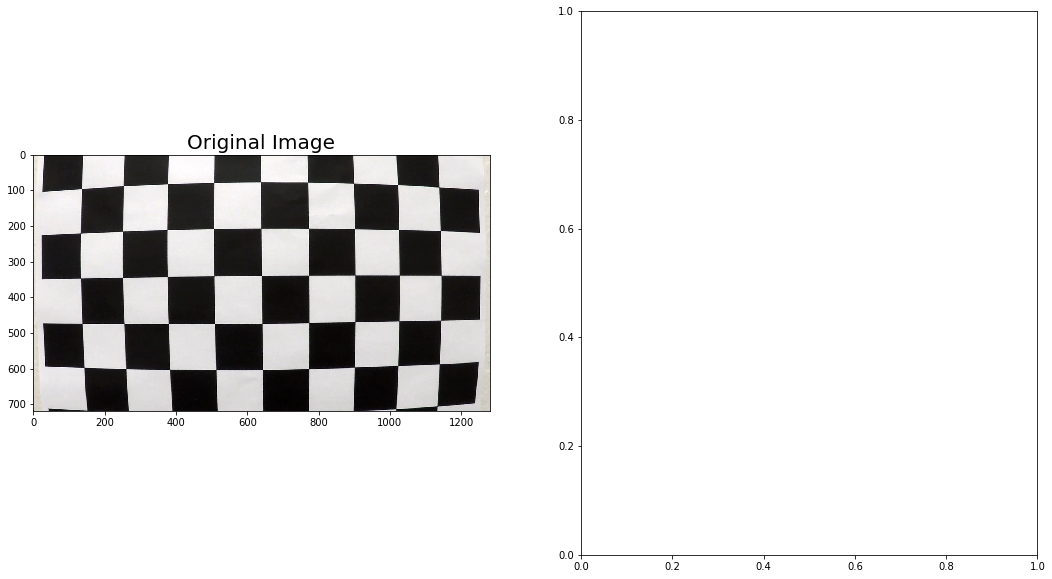

In [14]:
plot_pair_imgs(cam_cal_imgs, corner_imgs)